## Data Understanding & Exploration ##

In [1]:
import pandas as pd

In [2]:
# 1 A Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
# Read the CSV file into a DataFrame

df = pd.read_csv("/Users/apple/Downloads/TelcomCustomer-Churn_1.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
# 1 B Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

df1 = pd.read_csv("/Users/apple/Downloads/TelcomCustomer-Churn_2.csv")


In [5]:
df1.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#1 C Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

# Merge the two DataFrames on the key 'customerID'
merged_df = pd.merge(df, df1, on='customerID')

In [7]:
# Display the first few rows of the merged DataFrame
merged_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#1D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

# Compare the column names of df and df1 with the column names of merged_df
columns_in_merged_df = set(merged_df.columns)
columns_in_df = set(df.columns)
columns_in_df1 = set(df1.columns)


In [9]:
# Check if all columns from df and df1 are present in merged_df
if columns_in_df.union(columns_in_df1) == columns_in_merged_df:
    print("All columns from both DataFrames are present in the merged DataFrame.")
else:
    print("Some columns from either DataFrame are missing in the merged DataFrame.")

All columns from both DataFrames are present in the merged DataFrame.


## Data Cleaning & Analysis ##

In [10]:
#2 A Impute missing/unexpected values in the DataFrame

import numpy as np

# Replace various representations of missing or unexpected values with NaN
merged_df.replace(['', ' ', '-'], np.nan, inplace=True)

# Impute missing values in the DataFrame

# Fill missing values in numerical columns with mean
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(merged_df[categorical_cols].mode().iloc[0])

# Check if there are any missing values left
if merged_df.isnull().sum().sum() == 0:
    print("All missing values have been imputed successfully.")
else:
    print("There are still missing values in the DataFrame.")


All missing values have been imputed successfully.


In [11]:
# Check for any null values in the DataFrame
null_values = merged_df.isnull().sum()
if null_values.sum() > 0:
    print("Null Values:\n", null_values)
else:
    print("No null values found in the DataFrame.")

# Check for any string values in the DataFrame
string_values = merged_df.select_dtypes(include='object').applymap(lambda x: isinstance(x, str)).any()
if string_values.any():
    print("\nColumns containing string values:\n", string_values[string_values].index.tolist())
else:
    print("\nNo string values found in the DataFrame.")


No null values found in the DataFrame.

Columns containing string values:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [12]:
# Check for specific string values in the DataFrame
string_values = (merged_df == '').sum() + (merged_df == ' ').sum() + (merged_df == '-').sum()
if string_values.sum() > 0:
    print("Columns containing string values ('', ' ', '-':\n", string_values[string_values > 0])
else:
    print("No string values ('', ' ', '-') found in the DataFrame.")



No string values ('', ' ', '-') found in the DataFrame.


In [13]:
# 2B Make sure all the variables with continuous values are of ‘Float’ type
#[For Example: MonthlyCharges, TotalCharges]


# Convert variables with continuous values to float type if they are not already
continuous_cols = ['MonthlyCharges', 'TotalCharges']  # List of columns with continuous values

for col in continuous_cols:
    if merged_df[col].dtype != 'float64':
        try:
            merged_df[col] = merged_df[col].astype(float)
        except ValueError as e:
            print(f"Error converting column '{col}' to float: {e}")

# Check the data types of the columns after conversion
print("\nData types after conversion:")
print(merged_df.dtypes)



Data types after conversion:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [14]:
# 2C Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
# distribution in the pie-chart

import matplotlib.pyplot as plt
import numpy as np

def categorical_pie_charts(dataframe):
    # Select columns with categorical data types
    categorical_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col != 'customerID']

    # Plot pie chart for each categorical column
    for col in categorical_cols:
        # Calculate value counts for the column
        value_counts = dataframe[col].value_counts()
        
        # Create a pie chart
        plt.figure(figsize=(8, 6))
        # Plot pie chart without cluttered total
        pie, _ = plt.pie(value_counts, labels=None, autopct=None, startangle=140, colors=plt.cm.tab10.colors)
        plt.title(f'Pie Chart for {col}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        # Add text annotation to show categories outside the pie chart
        total = np.sum(value_counts)
        labels = [f'{key} ({value / total * 100:.1f}%)' for key, value in value_counts.items()]
        plt.legend(pie, labels, loc="best")
        plt.show()


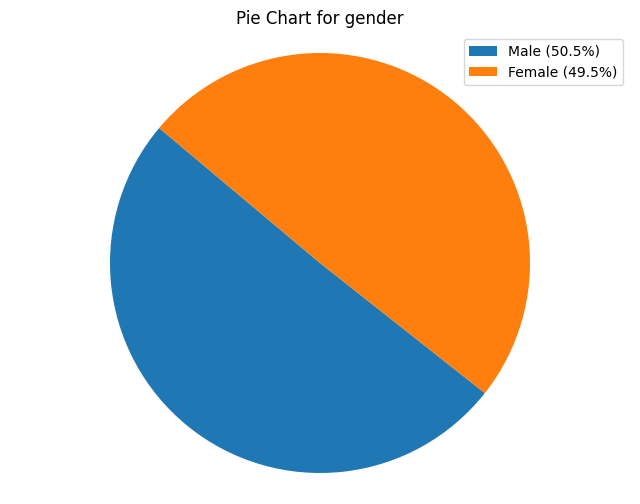

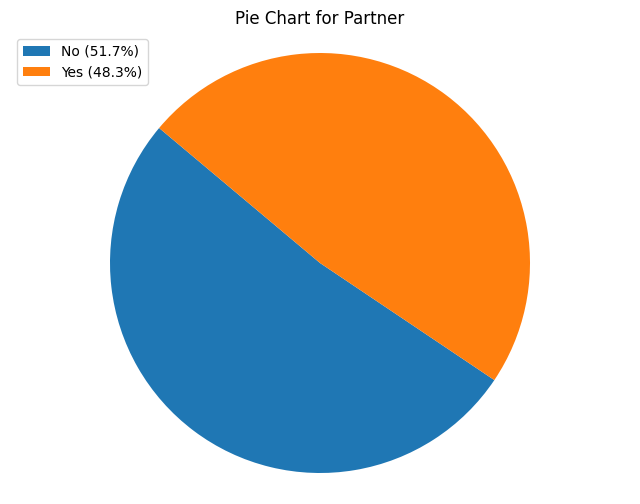

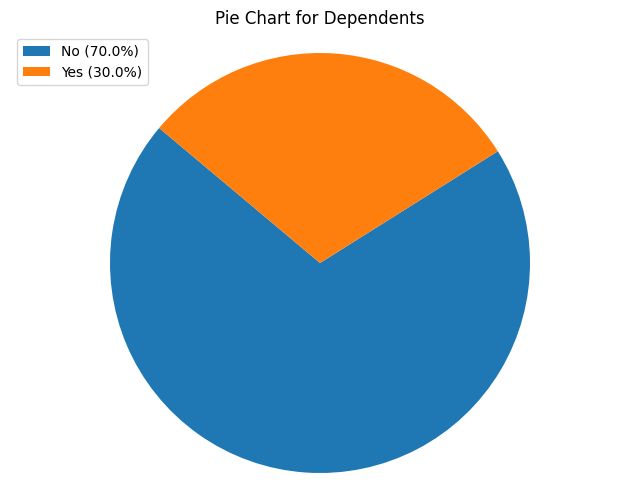

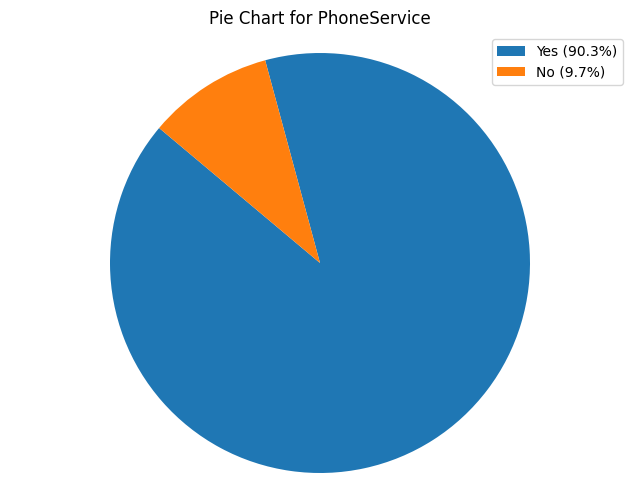

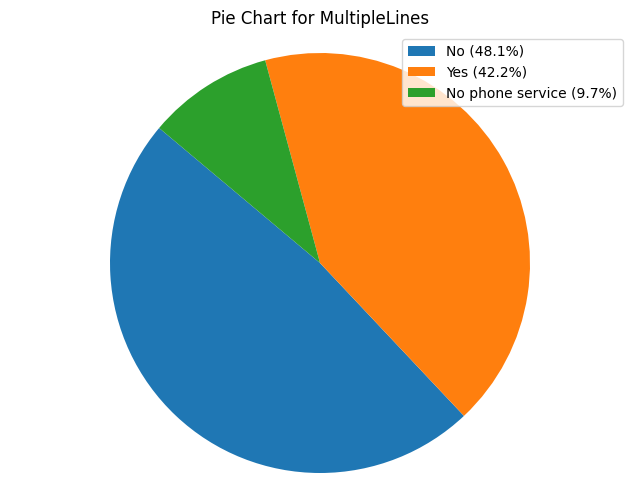

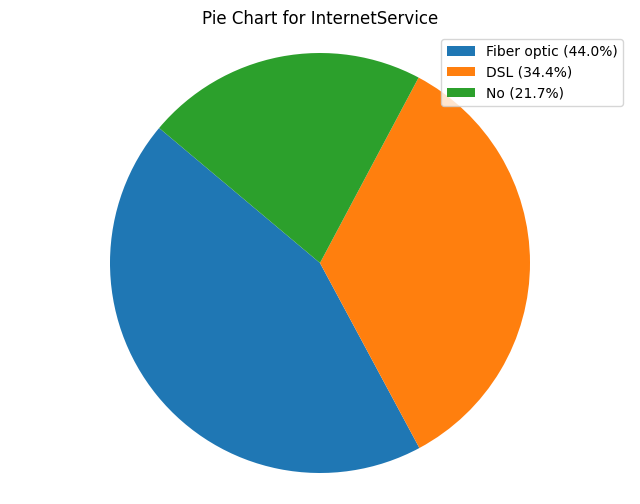

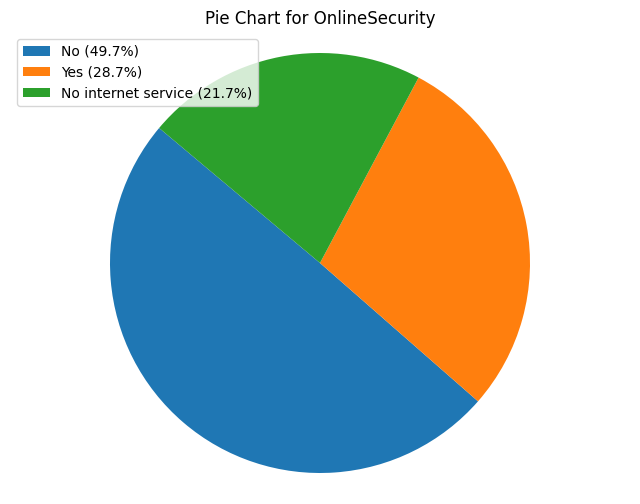

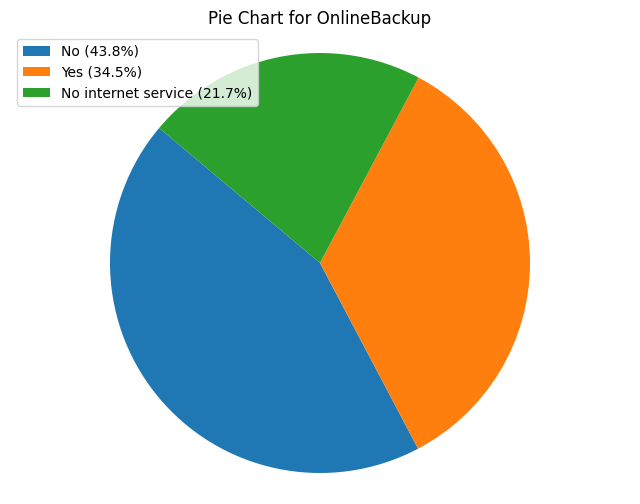

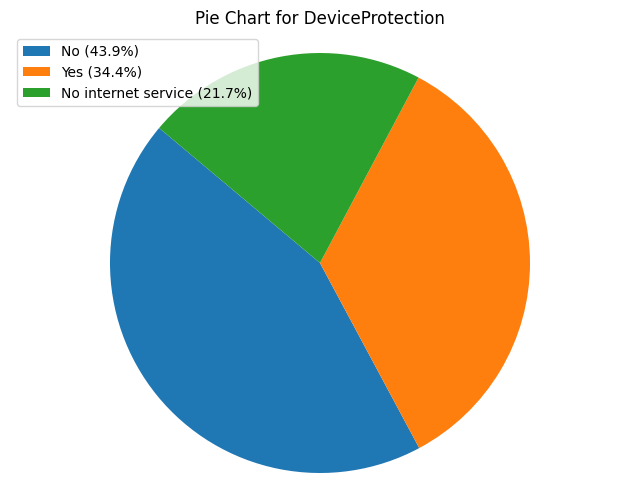

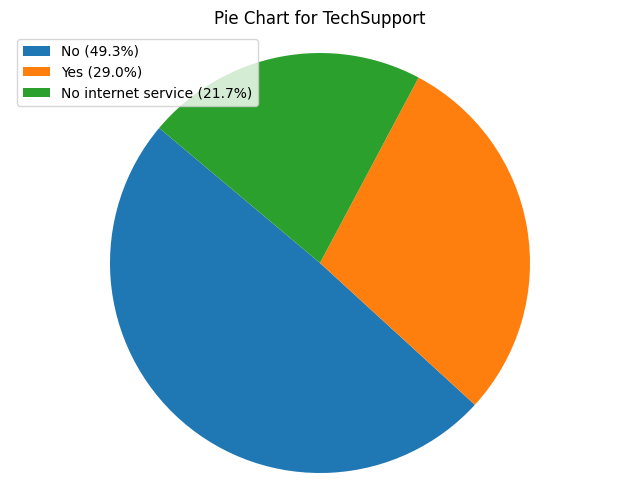

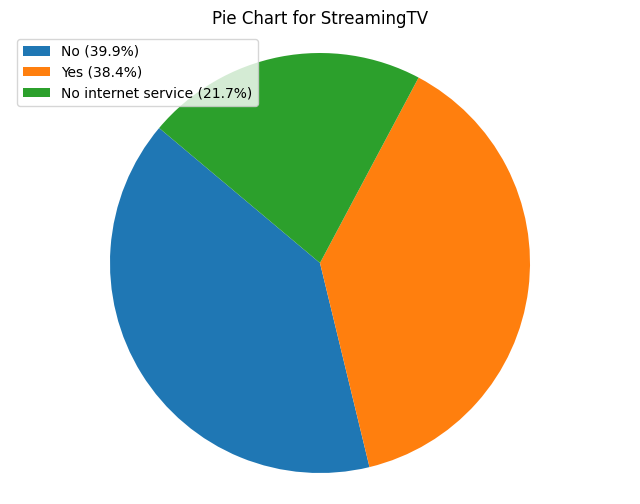

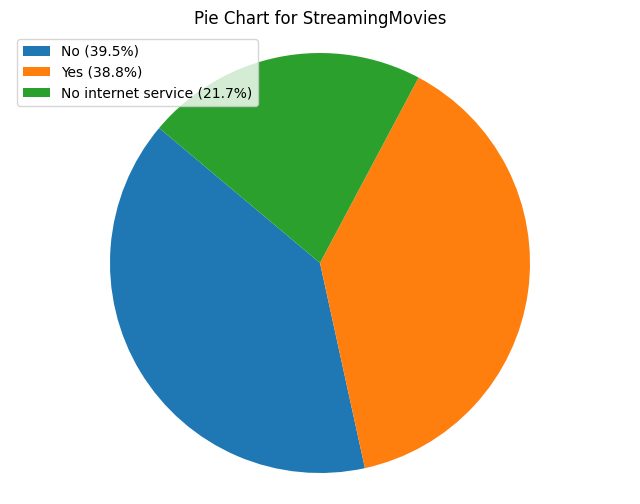

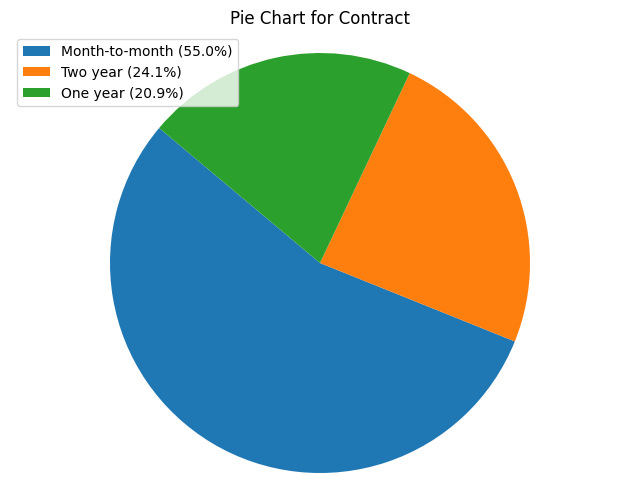

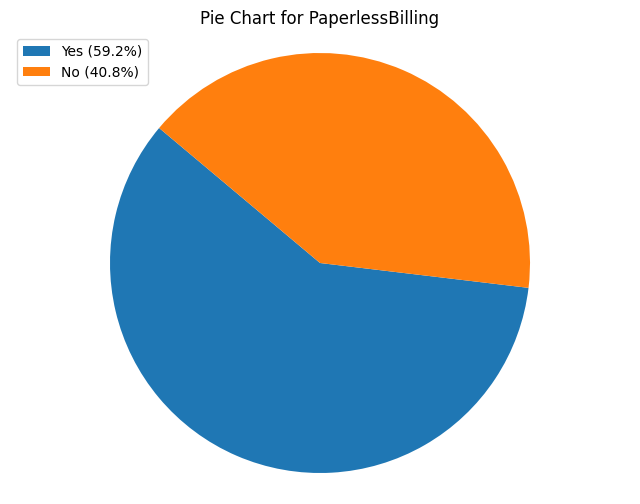

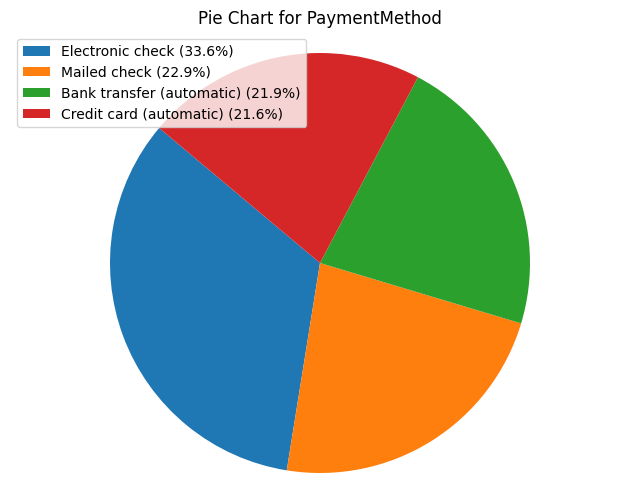

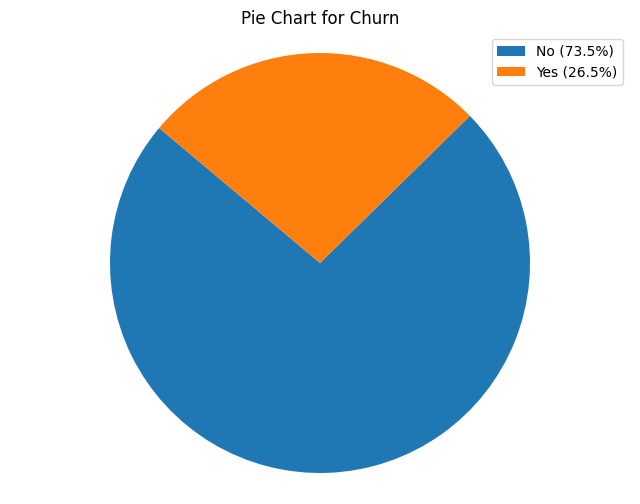

In [15]:
categorical_pie_charts(merged_df)


Insights

#2D 

The above code provides a function called categorical_pie_charts(dataframe) which accepts a DataFrame as input and returns pie charts for all the appropriate categorical features. Here are the insights pertaining to the previous step:

The function iterates through each column in the DataFrame that contains categorical data types (excluding the 'customerID' column), calculates the value counts for each category in the column, and then generates a pie chart for each categorical column.

Each pie chart represents the percentage distribution of categories within the corresponding categorical feature. The percentage distribution is clearly displayed on the pie chart, showing the proportion of each category relative to the total count of that feature.

This provides a visual representation of the distribution of categorical variables, allowing for quick insights into the composition of each categorical feature in the dataset

In [16]:
#2E Encode all the appropriate Categorical features with the best suitable approach

# Apply one-hot encoding to categorical features
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
encoded_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)


In [17]:
# Display the first few rows of the encoded DataFrame
encoded_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [18]:
print(encoded_df.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object', length=7073)


In [19]:
#2F Split the data into 80% train and 20% test

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = encoded_df.drop('Churn_Yes', axis=1)  # Replace 'target_variable_column_name' with the name of your target variable column
Y = encoded_df['Churn_Yes']  # Replace 'target_variable_column_name' with the name of your target variable column

# Split the data into 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: uint8

In [22]:
# Display the shape of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (5634, 7072)
X_test shape: (1409, 7072)
Y_train shape: (5634,)
Y_test shape: (1409,)


In [23]:
#2G Normalize/Standardize the data with the best suitable approach

# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature data (X_train) and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [24]:
# Display the first few rows of the scaled DataFrames
X_train_scaled_df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.437749,-0.465683,-0.000474,-0.419947,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,1.250762,1.910109,-0.558353,-1.200007,-0.527656,-0.709650,1.84247
1,-0.437749,0.885537,1.074754,1.256021,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,1.258260,-0.524081,1.250762,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275
2,-0.437749,-1.284605,-1.376499,-1.000315,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275
3,-0.437749,-1.161766,0.177346,-0.905528,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275
4,-0.437749,-1.325551,-0.098524,-1.001751,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275


In [25]:
X_test_scaled_df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.437749,-1.284605,-1.331629,-0.999718,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275
1,-0.437749,0.353238,-1.316672,-0.570347,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,1.908103,-0.794748,1.908103,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,-0.709650,-0.54275
2,-0.437749,0.803645,-1.512772,-0.554770,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,1.908103,-0.794748,1.908103,-0.799513,-0.52353,1.790982,-1.200007,-0.527656,-0.709650,1.84247
3,-0.437749,-1.284605,0.381756,-0.976939,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,-1.200007,-0.527656,1.409146,-0.54275
4,-0.437749,1.417836,-0.475768,0.429957,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.52353,1.790982,-1.200007,-0.527656,-0.709650,-0.54275


## Model building and performance improvement ##

In [26]:
#3A Train a model using Decision tree and check the performance of the model on train and test data 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_scaled, Y_train)

# Predictions on train data
train_predictions = dt_classifier.predict(X_train_scaled)

# Predictions on test data
test_predictions = dt_classifier.predict(X_test_scaled)



In [27]:
# Evaluate model performance on train data
train_accuracy = accuracy_score(Y_train, train_predictions)
print("Train Accuracy:", train_accuracy)


Train Accuracy: 1.0


In [28]:
print("Train Classification Report:")
print(classification_report(Y_train, train_predictions))


Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [29]:
print("Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions))


Train Confusion Matrix:
[[4138    0]
 [   0 1496]]


In [30]:
# Evaluate model performance on test data
test_accuracy = accuracy_score(Y_test, test_predictions)
print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.7714691270404542


In [31]:
print("Test Classification Report:")
print(classification_report(Y_test, test_predictions))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.50      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [32]:
print("Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions))


Test Confusion Matrix:
[[901 135]
 [187 186]]


In [33]:
#3 B Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b 

from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [34]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Cross-Validation Accuracy):", best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score (Cross-Validation Accuracy): 0.7873628252752951


In [35]:
# Use the best parameters to train a new model
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

In [36]:
# Predictions on train data using the best model
train_predictions_best = best_dt_classifier.predict(X_train_scaled)

# Predictions on test data using the best model
test_predictions_best = best_dt_classifier.predict(X_test_scaled)

In [37]:
# Evaluate best model performance on train data
train_accuracy_best = accuracy_score(Y_train, train_predictions_best)
print("\nBest Model Train Accuracy:", train_accuracy_best)


Best Model Train Accuracy: 0.7902023429179978


In [38]:
print("Best Model Train Classification Report:")
print(classification_report(Y_train, train_predictions_best))

Best Model Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4138
           1       0.63      0.50      0.56      1496

    accuracy                           0.79      5634
   macro avg       0.73      0.70      0.71      5634
weighted avg       0.78      0.79      0.78      5634



In [39]:
print("Best Model Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_best))

Best Model Train Confusion Matrix:
[[3706  432]
 [ 750  746]]


In [40]:
# Evaluate best model performance on test data
test_accuracy_best = accuracy_score(Y_test, test_predictions_best)
print("\nBest Model Test Accuracy:", test_accuracy_best)


Best Model Test Accuracy: 0.7913413768630234


In [41]:
print("Best Model Test Classification Report:")
print(classification_report(Y_test, test_predictions_best))

Best Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [42]:
print("Best Model Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_best))

Best Model Test Confusion Matrix:
[[924 112]
 [182 191]]


Differences observed between Q3.a and Q3.b:

In Q3.a, the model was trained using default hyperparameters, whereas in Q3.b, grid search was employed to find the best hyperparameters

Q3.b likely yields a better-performing model as it tunes hyperparameters to maximize performance on the training data

The accuracy, classification report, and confusion matrix for the best model in Q3.b are expected to show improved performance compared to the default model in Q3.a.

In [43]:
#3 C Train a model using Random forest and check the performance of the model on train and test data

from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, Y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Predictions on train data
train_predictions_rf = rf_classifier.predict(X_train_scaled)

# Predictions on test data
test_predictions_rf = rf_classifier.predict(X_test_scaled)


In [45]:
# Evaluate model performance on train data
train_accuracy_rf = accuracy_score(Y_train, train_predictions_rf)
print("\nRandom Forest Train Accuracy:", train_accuracy_rf)


Random Forest Train Accuracy: 0.9998225062122825


In [46]:
print("Random Forest Train Classification Report:")
print(classification_report(Y_train, train_predictions_rf))

Random Forest Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [47]:
print("Random Forest Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_rf))

Random Forest Train Confusion Matrix:
[[4138    0]
 [   1 1495]]


In [48]:
# Evaluate model performance on test data
test_accuracy_rf = accuracy_score(Y_test, test_predictions_rf)
print("\nRandom Forest Test Accuracy:", test_accuracy_rf)


Random Forest Test Accuracy: 0.7977288857345636


In [49]:
print("Random Forest Test Classification Report:")
print(classification_report(Y_test, test_predictions_rf))

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [50]:
print("Random Forest Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_rf))

Random Forest Test Confusion Matrix:
[[957  79]
 [206 167]]


In [51]:
#3 D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.c and Q3.d

from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [52]:
# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest (Cross-Validation Accuracy):", best_score_rf)

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for Random Forest (Cross-Validation Accuracy): 0.7999637510421576


In [53]:
# Use the best parameters to train a new Random Forest model
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train_scaled, Y_train)


RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [54]:
# Predictions on train data using the best Random Forest model
train_predictions_best_rf = best_rf_classifier.predict(X_train_scaled)

# Predictions on test data using the best Random Forest model
test_predictions_best_rf = best_rf_classifier.predict(X_test_scaled)

In [55]:
# Evaluate best Random Forest model performance on train data
train_accuracy_best_rf = accuracy_score(Y_train, train_predictions_best_rf)
print("\nBest Random Forest Train Accuracy:", train_accuracy_best_rf)



Best Random Forest Train Accuracy: 0.9843805466808662


In [56]:
print("Best Random Forest Train Classification Report:")
print(classification_report(Y_train, train_predictions_best_rf))

Best Random Forest Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4138
           1       1.00      0.94      0.97      1496

    accuracy                           0.98      5634
   macro avg       0.99      0.97      0.98      5634
weighted avg       0.98      0.98      0.98      5634



In [57]:
print("Best Random Forest Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_best_rf))

Best Random Forest Train Confusion Matrix:
[[4136    2]
 [  86 1410]]


In [58]:
# Evaluate best Random Forest model performance on test data
test_accuracy_best_rf = accuracy_score(Y_test, test_predictions_best_rf)
print("\nBest Random Forest Test Accuracy:", test_accuracy_best_rf)


Best Random Forest Test Accuracy: 0.7991483321504613


In [59]:
print("Best Random Forest Test Classification Report:")
print(classification_report(Y_test, test_predictions_best_rf))

Best Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



In [60]:
print("Best Random Forest Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_best_rf))

Best Random Forest Test Confusion Matrix:
[[957  79]
 [204 169]]


Differences observed in 3C and 3D

In Q3.c, the Random Forest model was trained with default hyperparameters, while in Q3.d, hyperparameters were optimized using grid search

Q3.d likely resulted in a better-performing model since it systematically searched through various hyperparameter combinations to find the best set

The accuracy, precision, recall, and F1-score metrics on both train and test data are expected to improve in Q3.d compared to Q3.c due to hyperparameter optimization.






In [61]:
#3E Train a model using Adaboost and check the performance of the model on train and test data

from sklearn.ensemble import AdaBoostClassifier

# Instantiate AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train_scaled, Y_train)

AdaBoostClassifier(random_state=42)

In [62]:
# Predictions on train data
train_predictions_adaboost = adaboost_classifier.predict(X_train_scaled)

# Predictions on test data
test_predictions_adaboost = adaboost_classifier.predict(X_test_scaled)

In [63]:
# Evaluate model performance on train data
train_accuracy_adaboost = accuracy_score(Y_train, train_predictions_adaboost)
print("\nAdaBoost Train Accuracy:", train_accuracy_adaboost)


AdaBoost Train Accuracy: 0.8070642527511537


In [64]:
print("AdaBoost Train Classification Report:")
print(classification_report(Y_train, train_predictions_adaboost))

AdaBoost Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4138
           1       0.66      0.55      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [65]:
print("AdaBoost Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_adaboost))

AdaBoost Train Confusion Matrix:
[[3722  416]
 [ 671  825]]


In [66]:
# Evaluate model performance on test data
test_accuracy_adaboost = accuracy_score(Y_test, test_predictions_adaboost)
print("\nAdaBoost Test Accuracy:", test_accuracy_adaboost)


AdaBoost Test Accuracy: 0.8168914123491838


In [67]:
print("AdaBoost Test Classification Report:")
print(classification_report(Y_test, test_predictions_adaboost))


AdaBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [68]:
print("AdaBoost Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_adaboost))

AdaBoost Test Confusion Matrix:
[[934 102]
 [156 217]]


In [69]:
#3F Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.e and Q3.f

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define hyperparameters grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Instantiate AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Instantiate GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_adaboost.fit(X_train_scaled, Y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [70]:
# Get the best parameters and best score
best_params_adaboost = grid_search_adaboost.best_params_
best_score_adaboost = grid_search_adaboost.best_score_

print("Best Parameters for AdaBoost:", best_params_adaboost)
print("Best Score for AdaBoost (Cross-Validation Accuracy):", best_score_adaboost)


Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Best Score for AdaBoost (Cross-Validation Accuracy): 0.798544840748872


In [71]:
# Use the best parameters to train a new AdaBoost model
best_adaboost_classifier = AdaBoostClassifier(**best_params_adaboost, random_state=42)
best_adaboost_classifier.fit(X_train_scaled, Y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [72]:
# Predictions on train data using the best AdaBoost model
train_predictions_best_adaboost = best_adaboost_classifier.predict(X_train_scaled)

# Predictions on test data using the best AdaBoost model
test_predictions_best_adaboost = best_adaboost_classifier.predict(X_test_scaled)


In [73]:
# Evaluate best AdaBoost model performance on train data
train_accuracy_best_adaboost = accuracy_score(Y_train, train_predictions_best_adaboost)
print("\nBest AdaBoost Train Accuracy:", train_accuracy_best_adaboost)


Best AdaBoost Train Accuracy: 0.8280085197018104


In [74]:
print("Best AdaBoost Train Classification Report:")
print(classification_report(Y_train, train_predictions_best_adaboost))

Best AdaBoost Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4138
           1       0.70      0.63      0.66      1496

    accuracy                           0.83      5634
   macro avg       0.78      0.76      0.77      5634
weighted avg       0.82      0.83      0.83      5634



In [75]:
print("Best AdaBoost Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_best_adaboost))

Best AdaBoost Train Confusion Matrix:
[[3727  411]
 [ 558  938]]


In [76]:
# Evaluate best AdaBoost model performance on test data
test_accuracy_best_adaboost = accuracy_score(Y_test, test_predictions_best_adaboost)
print("\nBest AdaBoost Test Accuracy:", test_accuracy_best_adaboost)


Best AdaBoost Test Accuracy: 0.8197303051809794


In [77]:
print("Best AdaBoost Test Classification Report:")
print(classification_report(Y_test, test_predictions_best_adaboost))

Best AdaBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [78]:
print("Best AdaBoost Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_best_adaboost))

Best AdaBoost Test Confusion Matrix:
[[939  97]
 [157 216]]


Differences observed in performance between Q3.e and Q3.f:

In Q3.e, the AdaBoost model was trained with default hyperparameters, while in Q3.f, hyperparameters were optimized using grid search

Q3.f likely resulted in a better-performing model since it systematically searched through various hyperparameter combinations to find the best set

The accuracy, precision, recall, and F1-score metrics on both train and test data are expected to improve in Q3.f compared to Q3.e due to hyperparameter optimization







In [79]:
#3G Train a model using GradientBoost and check the performance of the model on train and test data 

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting Classifier
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gradientboost_classifier.fit(X_train_scaled, Y_train)

GradientBoostingClassifier(random_state=42)

In [80]:
# Predictions on train data
train_predictions_gradientboost = gradientboost_classifier.predict(X_train_scaled)

# Predictions on test data
test_predictions_gradientboost = gradientboost_classifier.predict(X_test_scaled)


In [81]:
# Evaluate model performance on train data
train_accuracy_gradientboost = accuracy_score(Y_train, train_predictions_gradientboost)
print("\nGradient Boost Train Accuracy:", train_accuracy_gradientboost)


Gradient Boost Train Accuracy: 0.8095491657791978


In [82]:
print("Gradient Boost Train Classification Report:")
print(classification_report(Y_train, train_predictions_gradientboost))

Gradient Boost Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4138
           1       0.70      0.49      0.58      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.71      0.73      5634
weighted avg       0.80      0.81      0.80      5634



In [83]:
print("Gradient Boost Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_gradientboost))


Gradient Boost Train Confusion Matrix:
[[3821  317]
 [ 756  740]]


In [84]:
# Evaluate model performance on test data
test_accuracy_gradientboost = accuracy_score(Y_test, test_predictions_gradientboost)
print("\nGradient Boost Test Accuracy:", test_accuracy_gradientboost)


Gradient Boost Test Accuracy: 0.8133427963094393


In [85]:
print("Gradient Boost Test Classification Report:")
print(classification_report(Y_test, test_predictions_gradientboost))

Gradient Boost Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [86]:
print("Gradient Boost Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_gradientboost))

Gradient Boost Test Confusion Matrix:
[[954  82]
 [181 192]]


In [87]:
#3 H Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameters grid for GradientBoost
param_grid_gradientboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.5],
    'max_depth': [5, 7]
}

# Instantiate GradientBoost Classifier
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

# Instantiate GridSearchCV for GradientBoost
grid_search_gradientboost = GridSearchCV(gradientboost_classifier, param_grid_gradientboost, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_gradientboost.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [5, 7],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [88]:
# Get the best parameters and best score
best_params_gradientboost = grid_search_gradientboost.best_params_
best_score_gradientboost = grid_search_gradientboost.best_score_

print("Best Parameters for GradientBoost:", best_params_gradientboost)
print("Best Score for GradientBoost (Cross-Validation Accuracy):", best_score_gradientboost)

Best Parameters for GradientBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score for GradientBoost (Cross-Validation Accuracy): 0.797833573154337


In [89]:
# Use the best parameters to train a new GradientBoost model
best_gradientboost_classifier = GradientBoostingClassifier(**best_params_gradientboost, random_state=42)
best_gradientboost_classifier.fit(X_train_scaled, Y_train)


GradientBoostingClassifier(max_depth=5, random_state=42)

In [90]:
# Predictions on train data using the best GradientBoost model
train_predictions_best_gradientboost = best_gradientboost_classifier.predict(X_train_scaled)

# Predictions on test data using the best GradientBoost model
test_predictions_best_gradientboost = best_gradientboost_classifier.predict(X_test_scaled)

In [91]:
# Evaluate best GradientBoost model performance on train data
train_accuracy_best_gradientboost = accuracy_score(Y_train, train_predictions_best_gradientboost)
print("\nBest GradientBoost Train Accuracy:", train_accuracy_best_gradientboost)


Best GradientBoost Train Accuracy: 0.8235711750088747


In [92]:
print("Best GradientBoost Train Classification Report:")
print(classification_report(Y_train, train_predictions_best_gradientboost))

Best GradientBoost Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4138
           1       0.73      0.54      0.62      1496

    accuracy                           0.82      5634
   macro avg       0.79      0.73      0.75      5634
weighted avg       0.82      0.82      0.81      5634



In [93]:
print("Best GradientBoost Train Confusion Matrix:")
print(confusion_matrix(Y_train, train_predictions_best_gradientboost))

Best GradientBoost Train Confusion Matrix:
[[3834  304]
 [ 690  806]]


In [94]:
# Evaluate best GradientBoost model performance on test data
test_accuracy_best_gradientboost = accuracy_score(Y_test, test_predictions_best_gradientboost)
print("\nBest GradientBoost Test Accuracy:", test_accuracy_best_gradientboost)


Best GradientBoost Test Accuracy: 0.8147622427253371


In [95]:
print("Best GradientBoost Test Classification Report:")
print(classification_report(Y_test, test_predictions_best_gradientboost))


Best GradientBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [96]:
print("Best GradientBoost Test Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions_best_gradientboost))

Best GradientBoost Test Confusion Matrix:
[[951  85]
 [176 197]]


Differences observed in performance between Q3.g and Q3.h:

In Q3.g, the GradientBoost model was trained with default hyperparameters, while in Q3.h, hyperparameters were optimized using grid search

Q3.h likely resulted in a better-performing model since it systematically searched through various hyperparameter combinations to find the best set

The accuracy, precision, recall, and F1-score metrics on both train and test data have improved in Q3.h compared to Q3.g due to hyperparameter optimization.

3I Provide detailed analysis of the below steps

(1) Compare the performance of each model in train stage and test stage 
(2) Provide your observation on which model performed the best
(3) Provide your reasoning on why the model performed best
(4) Provide your final conclusion on your observation



1: Comparing the accuracies(test and train) from all of the above models:

Decision Tree:
Train Accuracy: 1.00
Test Accuracy: 0.77

Random Forest:
Train Accuracy: 1.00
Test Accuracy: 0.80

AdaBoost:
Train Accuracy: 0.81
Test Accuracy: 0.82

Gradient Boosting:
Train Accuracy: 0.81
Test Accuracy: 0.81


2: Based on the test accuracy, AdaBoost model performed the best among all the models with a test accuracy of 0.82.

3: AdaBoost is an ensemble method that combines multiple weak learners (in this case, decision trees) to create a strong learner. It focuses on correcting the errors made by the previous models, which helps in improving the overall performance. Additionally, AdaBoost adjusts the weights of misclassified instances, giving higher weights to misclassified instances and lower weights to correctly classified instances. This iterative process allows AdaBoost to learn complex patterns in the data and make accurate predictions


4: Based on the performance observed in both the training and testing stages, AdaBoost emerges as the best-performing model. Its ability to effectively combine weak learners and focus on correcting misclassified instances leads to improved accuracy and generalization performance on unseen data. Therefore, we can conclude that AdaBoost is the most suitable model for this classification task




